# Imports y Funciones toolies

In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
#deepcopy
from copy import deepcopy
#plt muerte
import matplotlib.pyplot as plt
#para splitear el set de puntos
from sklearn.model_selection import train_test_split
from IPython.display import display
#Para el warning de la convergencia
import warnings
warnings.filterwarnings("ignore")
#Para el Ejercicio 4 del TP1
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
#iris
from sklearn.datasets import load_iris

In [6]:
#función que entrena una red ya definida previamente "evaluaciones" veces, cada vez entrenando un número de épocas elegido al crear la red y midiendo el error en train, validación y test al terminar ese paso de entrenamiento. 
#Guarda y devuelve la red en el paso de evaluación que da el mínimo error de validación
#entradas: la red, las veces que evalua, los datos de entrenamiento y sus respuestas, de validacion y sus respuestas, de test y sus respuestas
#salidas: la red entrenada en el mínimo de validación, los errores de train, validación y test medidos en cada evaluación
def entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, RegClas = 0):
    NN_Best = None
    
    NN_error_Train_Best = None
    NN_error_Test_Best = None
    NN_error_Validation_Best = None
    
    NN_current_error_train = None
    NN_current_error_val = None
    NN_current_error_test = None
    
    NN_e_train = []
    NN_e_val = []
    NN_e_test = []

    NN_current_error_train = 0.0
    NN_current_error_val = 0.0
    NN_current_error_test = 0.0

    for i in range(evaluaciones): # Evaluaciones son las epocas de entrenamiento
        #Acordate que el split train te devuelve DF por lo tanto como se entrena con LISTAS tengo que convertirlo lpm    
        NN = red.fit(X_train, y_train)
        
        NN_pred_train = NN.predict(X_train)
        NN_pred_val = NN.predict(X_val)
        NN_pred_test = NN.predict(X_test)
        
        if RegClas == 0: #Regresion metrics
            NN_current_error_train = sk.metrics.mean_squared_error(y_train, NN_pred_train)
            NN_current_error_val = sk.metrics.mean_squared_error(y_val, NN_pred_val)
            NN_current_error_test = sk.metrics.mean_squared_error(y_test, NN_pred_test)
        else: #Classifier metrics
            NN_current_error_train = sk.metrics.zero_one_loss(y_train, NN_pred_train)
            NN_current_error_val = sk.metrics.zero_one_loss(y_val, NN_pred_val)
            NN_current_error_test = sk.metrics.zero_one_loss(y_test, NN_pred_test)

        #Guardamos el error para la epoca
        NN_e_train.append(NN_current_error_train)
        NN_e_val.append(NN_current_error_val)
        NN_e_test.append(NN_current_error_test)    
        #Reemplazo de valores de error, minificandolo en la validacion
        if NN_error_Validation_Best is None or NN_current_error_val < NN_error_Validation_Best :
            NN_error_Validation_Best = NN_current_error_val
            NN_error_Train_Best = NN_current_error_train
            NN_error_Test_Best = NN_current_error_test
            NN_Best = deepcopy(red)

    #Retornamos la mejor red y los errores para las "evaluaciones" cantidad de epocas
    return NN_Best, NN_e_train, NN_e_val, NN_e_test, NN_error_Train_Best,NN_error_Validation_Best, NN_error_Test_Best

In [16]:
#epocas es la cantidad de veces que entreno la red y mido los errores
#Graficar los valores medidos en cada epoca o evaluacion
def graficar_errores_contra_epocas(e_train, e_val, e_test, epocas):
    plt.plot(range(epocas), e_train, label="train", linestyle=":")
    plt.plot(range(epocas), e_val, label="validacion", linestyle="-.")
    plt.plot(range(epocas), e_test, label="test", linestyle="-")
    plt.legend()
    plt.show()

def graficar_errores_contra_epocas2(e_train, e_test, epocas):
    plt.plot(range(epocas), e_train, label="train", linestyle=":")
    plt.plot(range(epocas), e_test, label="test", linestyle="-")
    plt.legend()
    plt.show()

def graficar_errores_contra_epocas3(e_pesos, epocas):
    plt.plot(range(epocas), e_pesos, label="Pesos", linestyle=":")
    plt.legend()
    plt.show()

#Grafico la prediccion de una red
def graficar_nn(x, y, colname, title):
    df = pd.DataFrame(x)
    df['Clase'] = y
    df.plot(x=0, y=1, kind='scatter', c=colname, colormap='jet', title=title)
    

# EJERCICIO 1: 
Aunque lo he ejecutado muchas veces podemos coincidir que las redes con 20 a 40 neuronas generalmente muestran algo "similar/intento" no necesariamente decente... pero a tiempos de entrenamientos y costos podemos decir que para el problema de las espirales es mejor el entrenamiento con arboles de decision. Capaz manipulando con otros valores de alfa y eta se podría llegar a un mejor desempeño.
Se podría aumentar la cantidad de puntos para el train, porque si bien el generador los genera de forma "distribuida" en el plano al split no necesariamente queda un pool de puntos de igual forma distribuidos, se podría asumir que estas deformaciones en el grafico son por el spliteo azaroso de los puntos, si bien las clases no se solapan o hay ruido la existencia de mas puntos de una clase que de otra en una zona específica puede desviar el resultado y "capaz" con el momentum grande pasa de largo ese minimo local capaz. 

### Spiral Generator

In [5]:
def SnailNestedSpiral(n):
    clase1 = []
    clase2 = []
    clasePuntos = []
    puntosC1 = 0
    puntosC2 = 0
    
    while puntosC1 < n//2 or puntosC2 < n//2 :
        ro = np.sqrt(np.random.uniform(low=0.0, high=1.0))
        phiCirc = np.random.uniform(low= 0.0, high= np.pi * 2)      
        x = ro * np.cos(phiCirc)
        y = ro * np.sin(phiCirc)
        if ((phiCirc) / (4*np.pi) < ro and ro < ((phiCirc)+np.pi) / (4*np.pi)) or ((phiCirc + 2*np.pi) / (4*np.pi) < ro and ro < ((phiCirc + 2*np.pi)+np.pi) / (4*np.pi)) or ((phiCirc - 2*np.pi) / (4*np.pi) < ro and ro < ((phiCirc- 2*np.pi)+np.pi) / (4*np.pi)):
            if(puntosC1 < n//2):
                clasePuntos.append([x,y, 1])
                puntosC1 += 1
        else:
            if( puntosC2 < n//2):
                clasePuntos.append([x,y, 2])
                puntosC2 += 1

    columnas = [("Coor"+ str(i+1)) for i in range(2)] #Hago una label para las columas sino queda feo
    columnas.append("Clase")
    dataPuntos =  pd.DataFrame(clasePuntos, columns = columnas) #Hago el dataFrame con los puntos de la clase1 y con la label
    return dataPuntos

### NN

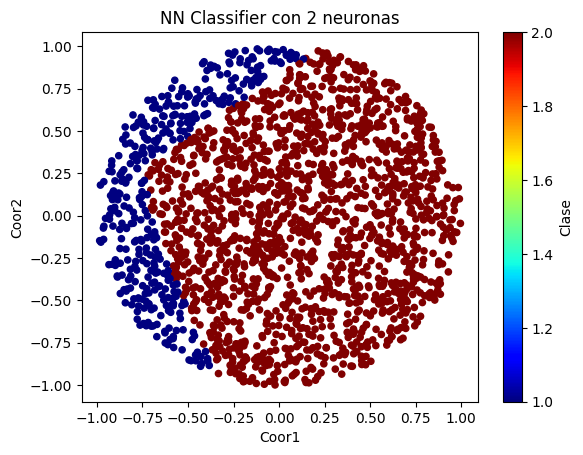

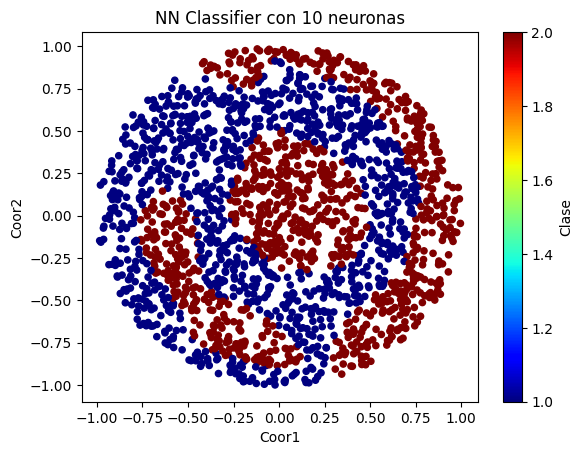

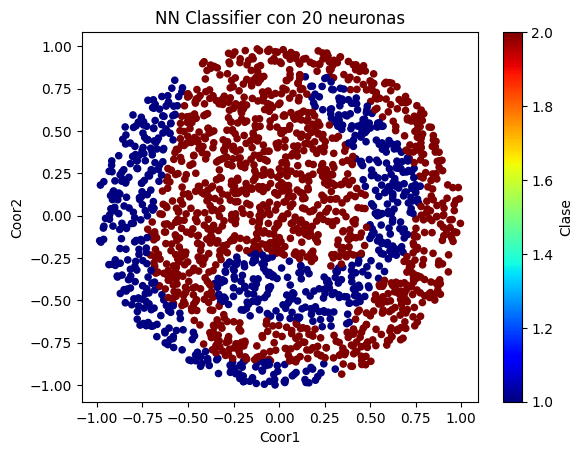

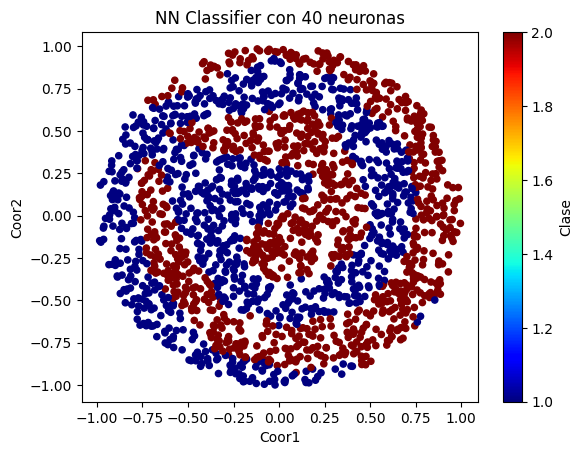

In [9]:
def ej1():
    #Creamos el dataframe con los puntos
    dotsDF = SnailNestedSpiral(2600)
    #Separamos del dataframe las variables y su resultado
    dotsDFX, dotsDFY = dotsDF.loc[:,["Coor1","Coor2"]] , dotsDF.loc[:,["Clase"]]
    #Separamos el train del test
    dots_X_trainAndVal, dots_X_test, dots_y_trainAndVal, dots_y_test = train_test_split(dotsDFX, dotsDFY, train_size= 600, test_size = 2000)
    #Separamos el validation del train
    dots_X_train, dots_X_validation, dots_y_train, dots_y_validation = train_test_split(dots_X_trainAndVal, dots_y_trainAndVal,  test_size = 0.20)

    #Parametros de las redes
    N2s = [2, 10, 20, 40]
    epocas_por_entrenamiento= 20   #numero de epocas que entrena cada vez
    eta=0.01              #learning rate
    alfa=0.9               #momentum
    evaluaciones = 1000   #evaluaciones
  
    for neurons in N2s:
        N2=neurons                 #neuronas en la capa oculta
        #Creo el classifier
        #defino MLP para clasificación
        spiralNN = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
        #Entreno la red, una cantidad de evaluacion veces
        nn, e_train, e_val, e_test, best_e_train, best_e_val, best_e_test = entrenar_red(spiralNN,evaluaciones,dots_X_train,dots_y_train,dots_X_validation,dots_y_validation,dots_X_test,dots_y_test,RegClas = 1)
        #Le paso una copia con loc a la funcion de grafica sino me mergea los Xs con los pred
        pred_test = nn.predict(dots_X_test)
        graficar_nn(dots_X_test.loc[:,["Coor1","Coor2"]],pred_test,"Clase","NN Classifier con "+ str(neurons)+" neuronas")

ej1()

# Ejercicio 2
Podemos ver en la tabla distintos valores de test error para cualquiera sea la combinacion de eta-alfa. Entre estas combinaciones detaca *insertar* haciendo analisis de esta combinacion empecemos desde el sampleo de los puntos de train porque al tener random_state=1 depende mucho el valor a los que ese momento se extraigan del .data( si se entrena con puntos raros... y corremos todo de nuevo). Ahora en la grafica podemos ver como a traves de las epocas podemos ver que las lineas de los errores se acompañan en el sentido que las lineas de validacion, train error y test error van bajando juntas y no se da una cierta "divergencia" de alguna de ellas como para suponer un overfitting del modelo. Hablando de los parametros y sabiendo que entrenamos con un subconjunto de los datos( la mitad de los disponible) y al obtener con relativamente pocos datos podemos decir que el momentum más alto del modelo no se estanca fácilmente en un mínimo local y el learning rate es suficiente para que el modelo aprenda con la cantidad de iteraciones dadas, pero no lo suficientemente alto para obtener un sobreajuste. 
# Observacion:
Lo horrible es que no pude hacer que el promedio de error Test de los 10 entrenamientos sea menor a 5% como un conjunto sino que en promedio un 7% u 8% cosa rara porque he corrido por ejemplo aislado el eta:0.1 y el 0.5 dando promedio 5% o 4% similar con el eta 0.01 y alfa 0.9, cosa que cuando corro todas las combinaciones de eta-alfa ese 5%/4% pasa como mucho a un 7% puede ser por el sampleo de esos 500 puntos o no lo sé. Pero el error para la mejor red (red que pertenece a la familia del eta-alfa que da menos error en promedio) está inferior a 4% 

,Eta,Alfa,Promedio 10 NN
0,0.100,0.0,0.08620
1,0.100,0.5,0.11995
2,0.100,0.9,0.10670
3,0.010,0.0,0.23490
4,0.010,0.5,0.19955
5,0.010,0.9,0.07990
6,0.001,0.0,0.24350
7,0.001,0.5,0.24350
8,0.001,0.9,0.24350


El best eta !#Bite#!: 0.01
El best alfa !#Bite#!: 0.9


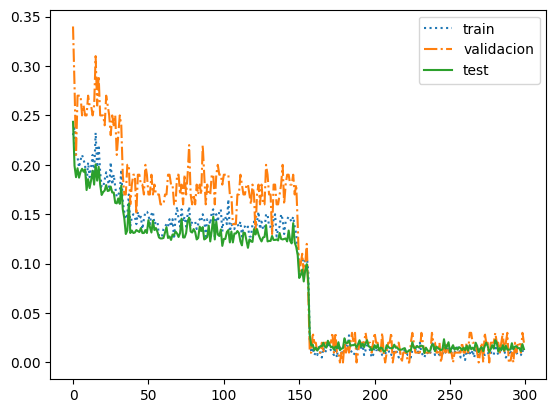

In [21]:
def ej2():
    # Leemos los datos del dataframe, sacamos los puntos de validation y train
    data_cols = ['Coor1', 'Coor2', 'Clase']
    data_df = pd.read_csv('dos_elipses.data',header=None, names=data_cols)

    # Separamos los datos, la validation y la train
    sample_df = data_df.sample(n = 500,random_state=1)
    dots_X_train, dots_X_validation, dots_y_train,dots_y_validation= train_test_split(sample_df.loc[:,["Coor1","Coor2"]], sample_df.loc[:,["Clase"]], train_size= 0.80, random_state=0)
    # Leemos el .test y separamos sus puntos
    test_data_df = pd.read_csv('dos_elipses.test',header=None, names=data_cols)
    # Separamos los datos, el test
    dots_X_test,dots_y_test = test_data_df.loc[:,["Coor1","Coor2"]], test_data_df.loc[:,["Clase"]]

    #Declaramos los parametros para la red
    N2 = 6 #Cantidad de neuronas
    evaluaciones = 300 #Evaluaciones por cada entrenamiento(evaluaciones ssame epocas???)
    epocas = 50 #Epocas por cada entrenamiento
    etas = [0.1, 0.01, 0.001] #learning rate
    #etas = [0.1] #learning rate
    #alfas = [0.5] #momentum
    alfas = [0,0.5,0.9] #momentum
    entrenamientosIgualesNN = 10 #Cantidad de redes que voy a entrenar con los mismos Train para sacarle los resultados
    promedioErrorNN = []

    best_eta_alfa_error = None
    best_eta_alfa_values = None
    best_eta_alfa = None
    best_promedio = None

    for eta in etas:
        for alfa in alfas:
            erroresNN = []
            # Vamos a guardar la mejor red para eta,alfa de las 10 iteraciones
            best_local_best_error = None
            best_local_error_values = None
            for trainId in range(0,entrenamientosIgualesNN):
                #Creo el clasificador
                elipseNN = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
                #Entreno la NN el clasificador
                #RETORNA EL MEJOR MODELO NN EL QUE DIO EL MEJOR ERROR EN LAS EPOCAS
                #Las evaluaciones son las epocas qeu voy a fitear una nn con los mismos datos
                nn, e_train, e_val, e_test, best_e_train, best_e_val, best_e_test = entrenar_red(elipseNN,evaluaciones,dots_X_train,dots_y_train,dots_X_validation,dots_y_validation,dots_X_test,dots_y_test,RegClas = 1)
                #Guardo el mejor test error de la NN i
                erroresNN.append(best_e_test)
                #Ahora me quedo con la mejor red dentro de las que entrenamos igualmente(10) por fuera del entrenar_red
                #es la mejor red eta-alfa
                if best_local_best_error is None or best_e_test < best_local_best_error :
                    best_local_best_error = best_e_test #Valor de error de la mejor red de las 10
                    best_local_error_values = (e_train, e_val, e_test) #Todos los errores de la mejor red de las 10
            #Calculo para un eta-alfa su promedio de mejores 10 errores 
            promedioerrorNN = np.mean(erroresNN)
            promedioErrorNN.append([eta,alfa,promedioerrorNN])
            #Calculo la mejor eta-alfa para cada iteración viendo si el promedio de las 10 para un eta-alfa' es mejor que la que ya teniamos
            #Dentro del promedio de las 10 nn para un eta-alfa comparo por el promedio, pero me quedo con el mejor local de esas 10
            if best_promedio is None or promedioerrorNN < best_promedio :
                best_promedio = promedioerrorNN #Actualizo el mejor promedio
                best_eta_alfa_error = best_local_best_error #Actualizo el mejor error en ese promedio
                best_eta_alfa = (eta, alfa) #Actualizo los eta-alfa
                best_eta_alfa_values = best_local_error_values #Actualizo la lista de errores para las epocas
            
    tabla = pd.DataFrame(promedioErrorNN,columns = ["Eta","Alfa","Promedio 10 NN"])
    display(tabla)

    #Grafica profe gg
    #el eje X son de 0 a evaluaciones, y el Y son los array que les paso. Se plotean en orden, puedo pasar un array a gusto ej [2,3,6] en vez de 
    #evaluaciones para plotear salteado
    print("El best eta !#Bite#!: "+str(best_eta_alfa[0]))
    print("El best alfa !#Bite#!: "+str(best_eta_alfa[1]))
    graficar_errores_contra_epocas(best_eta_alfa_values[0],best_eta_alfa_values[1],best_eta_alfa_values[2],evaluaciones)
  
ej2()

### EJERCICIO 3
Analizando las graficas resultantes, se puede observar que al principio del entrenamiento, cuando el error todavía es alto este disminuye de forma más abrupta a menor tamaño del conjunto de validación, acercándose al mínimo error obtenido para cada red con menos evaluaciones, probablemente debido a que se le dan más datos para su entrenamiento.
### 95/5:
Podemos ver que las 3 "curvas" están bastantes "juntas" y la de validacion entre medio de la de train y test, cumpliendo su funcion de validar o ser un acercamiento de como va a trabajar la red en el "mundo real" sin llegar a ser el test. Tambien obsevamos que al tener mayor cantidad de puntos para entrenar el salto a un error "decente" se hace en la epoca 50 de forma abrupta para luego las 3 curvas centrarse en un comportamiento constante no habiendo un gap muy significativo entre ellas. A mi parecer la mejor proporcion porque asi nos ahorramos de entrenar con "pocos" puntos, la validacion como conjunto va a tender al error en el conjunto de test
### 75/25:
Podemos ver que al tener menos puntos para entrenar la red va a fittear con los que tiene, al ser pocos generalmente vas a poder encontrar una "rapida" solucion o minimo dado que no hay mucho de donde agarrarse. Si bien podemos decir que el conjunto de test el error es bueno, similar al 95/5, pero al analizar la validacion es significativamente superior al del test esto quiere decir que como la validacion como conjunto es grande tenemos 2 problemas: le sacamos puntos posiblemente sensibles para que la red entrene y al ser grande el conjunto se podría ver como un test 2.0. Por lo que en realidad el error de test no es lo que parece sino que tuvimos suerte que en el .test habia puntos más "parecidos" a la porcion que usamos para el train que los que habia para validar. Y como los puntos de validación al ser un conjunto grande deja de ser "raro" y pasa a ser representativo tambien de nuestro mundo real
### 50/50:
Arrastra el mismo problema en la validacion que el 75/25, sumado a que ahora tenemos menos puntos para entrenar y posiblemente haya menos "minimos" que buscar lo podemos ver en el descenso suave de las curvas a traves de las épocas, tambien porque al tener menos puntos los minimos son menos profundos tambien por así decirlo. Podemos ver que al final de la grafica se puede notar una divergencia leve entre el train y las otras dos, esto significa al sobre ajuste que se da sobre el acotado conjunto de entrenamiento haciendo que el error train tienda más a la baja y la validacion y test se quieran despegar. Sumado a los problemas de la validacion del 75/25 dado que el train deja de ser significativo etc

El grafico para la proporcion: 95.0/5.000000000000004


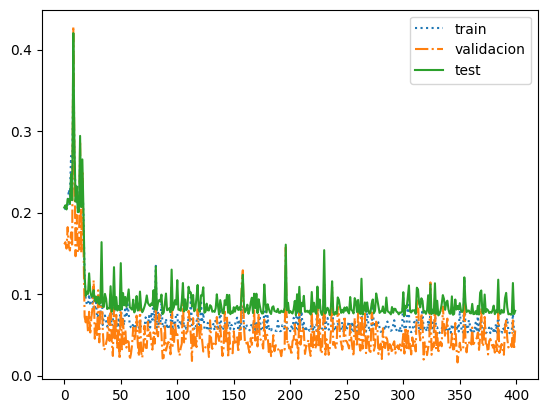

El grafico para la proporcion: 75.0/25.0


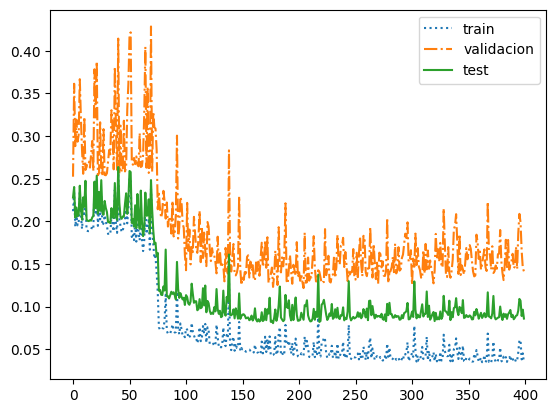

El grafico para la proporcion: 50.0/50.0


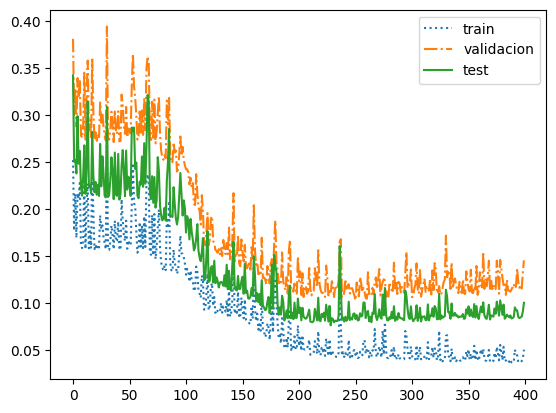

In [18]:
def ej3():
    # Leemos los datos del dataframe, sacamos los puntos de validation y train
    data_cols = ['X1', 'X2', 'X3', 'X4','X5', 'Y']
    data_df = pd.read_csv('ikeda.data', names=data_cols, delim_whitespace=True)

    per_of_train = [0.95,0.75,0.5] #Tamaño en porcentaje del conjunto de test

    # Leemos el .test y separamos sus puntos
    test_data_df = pd.read_csv('ikeda.test', names=data_cols, delim_whitespace=True)
    # Separamos los datos, el test
    test_df = test_data_df.sample(n = 2000)
    dots_X_test,dots_y_test = test_df.loc[:,["X1", "X2", "X3", "X4","X5"]], test_df.loc[:,["Y"]]

    #Declaramos los parametros para la red
    N2 = 30 #Cantidad de neuronas
    evaluaciones = 400 #Evaluaciones por cada entrenamiento(evaluaciones ssame epocas???)
    epocas = 50 #Epocas por cada entrenamiento
    etas = 0.01 #learning rate
    alfas = 0.9 #momentum
    entrenamientosIgualesNN = 10 #Cantidad de redes que voy a entrenar con los mismos Train para sacarle los resultados
    promedioErrorNN = []

    best_NNRegr_per_size = {}

    for size_of_train in per_of_train :
        dots_X_train, dots_X_validation, dots_y_train, dots_y_validation = train_test_split(data_df.loc[:,['X1', 'X2', 'X3', 'X4','X5']], data_df.loc[:,["Y"]], train_size= size_of_train, random_state=0)
        best_nn_local = None
        best_nn_error_local = None
        best_nn_errores_array = None
        for i in range(0,entrenamientosIgualesNN):
          regrIkeda = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=etas,momentum=alfas,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
          nn, e_train, e_val, e_test, best_e_train, best_e_val, best_e_test = entrenar_red(regrIkeda, evaluaciones, dots_X_train, dots_y_train, dots_X_validation, dots_y_validation, dots_X_test, dots_y_test, RegClas = 0)
          #De cada size me quedo con una
          if best_nn_error_local is None or best_e_val < best_nn_error_local:
            best_nn_error_local = best_e_val
            best_nn_local = nn
            best_nn_errores_array = (e_train, e_val, e_test)
        best_NNRegr_per_size[size_of_train] = (best_nn_local, best_nn_errores_array,best_nn_error_local)

    #Ahora tenemos en best_NNRegr_per_size la mejor nn y sus errores para graficar
    for size_of_train in per_of_train:
      print("El grafico para la proporcion: "+str(size_of_train*100.0)+"/"+str((1.0-size_of_train)*100.0))
      graficar_errores_contra_epocas(best_NNRegr_per_size[size_of_train][1][0], best_NNRegr_per_size[size_of_train][1][1], best_NNRegr_per_size[size_of_train][1][2], evaluaciones)

ej3()

### EJERCICIO 4
Tuve distintos valores para el mejor gamma vario entre 10^-6, 10^-5. En el caso del primero las veces que lo grafico se nota que al final por arriba de las 2000 evaluaciones hay cierto sobreajuste notable... el segundo las veces que se grafico el sobreajuste se dio más al final de las 2000 epocas pero no fue taaan notable sino que el train sigue bajando un poco y el test se comporta constante. En general 10^-5 te da el mismo error que el 10^-6, con menos sobre ajuste y lo importante que con menos penalizacion de peso menos de la mitad pasado. Voy a quedarme con 10^-5 para hacer el *weight-decay*

In [19]:
# entrenar red con weight-decay 
def entrenar_red_gamma(red, evaluaciones, X_train, y_train, X_test, y_test):
 
    NN_e_train = []
    NN_e_cincoPesos = []
    NN_e_test = []

    best_test_error_gamma = None
    best_train_error_gamma = None
    best_peso_gamma = None

    for i in range(evaluaciones): # Evaluaciones son las epocas de entrenamiento
        #Acordate que el split train te devuelve DF por lo tanto como se entrena con LISTAS tengo que convertirlo lpm
        #print(X_train.values.tolist(), y_train.values.tolist())
        #print(y_train['Clase'].values.tolist())
        
        NN = red.fit(X_train, y_train)
        
        NN_pred_train = NN.predict(X_train)
        NN_pred_test = NN.predict(X_test)

        NN_current_squared_sum_weights = sum(map(lambda a : np.sum(np.power(a, 2)), red.coefs_))
        NN_current_error_train = sk.metrics.mean_squared_error(y_train, NN_pred_train)
        NN_current_error_test = sk.metrics.mean_squared_error(y_test, NN_pred_test)

        #Guardamos el error para la epoca, DEL MEJOR GAMMA
        NN_e_train.append(NN_current_error_train)
        NN_e_cincoPesos.append(NN_current_squared_sum_weights)
        NN_e_test.append(NN_current_error_test)    

        if(best_test_error_gamma is None or NN_current_error_test < best_test_error_gamma  ):
          best_test_error_gamma = NN_current_error_test
          best_train_error_gamma = NN_current_error_train
          best_peso_gamma = NN_current_squared_sum_weights
      
    #Retornamos la mejor red y los errores para las "evaluaciones" cantidad de epocas
    return best_test_error_gamma,best_train_error_gamma,best_peso_gamma, NN_e_train, NN_e_cincoPesos, NN_e_test

      Gamma  Best Test error  Best Train error  Best Peso
0  0.000001         0.004296          0.003599  52.448292
1  0.000010         0.004512          0.003935  40.702916
2  0.000100         0.005114          0.004957  16.064331
3  0.001000         0.007258          0.007863   5.497228
4  0.010000         0.021000          0.023630   1.434408
5  0.100000         0.038003          0.042874   0.000109
6  1.000000         0.038004          0.042877   0.000209
El mejor gamma es: 1e-06


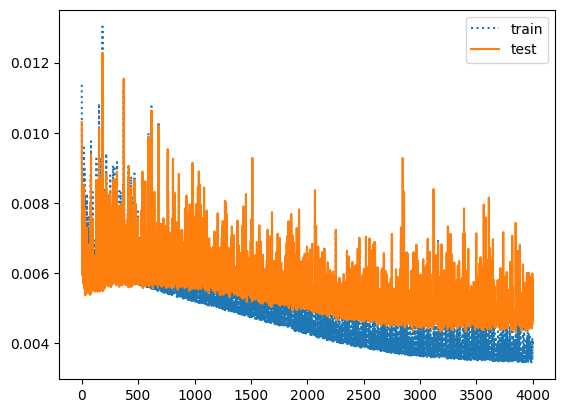

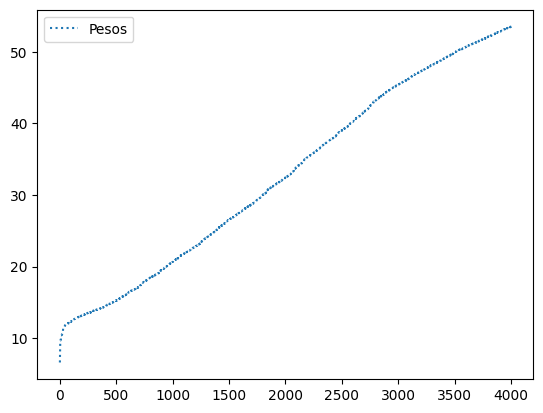

In [20]:
def ej4():
    #Declaramos los parametros para la red
    N2 = 6 #Cantidad de neuronas
    evaluaciones = 4000 #Evaluaciones por cada entrenamiento(evaluaciones ssame epocas???)
    epocas = 20 #Epocas por cada entrenamiento
    eta = 0.05 #learning rate
    alfa = 0.3 #momentum
    promedioErrorNN = []
    gammas = [10**i for i in range(-6,1)]

    columnsX = ["X"+str(i) for i in range(1,13)] 
    columnsY = ["Y"]
    data_df = pd.read_csv('ssp.data', names=columnsX + columnsY)
    dots_X_train, dots_y_train = data_df.loc[:,columnsX], data_df.loc[:,columnsY]
    test_df = pd.read_csv('ssp.test', names=columnsX + columnsY)
    dots_X_test, dots_y_test = test_df.loc[:,columnsX], test_df.loc[:,columnsY]

    best_gamma_test_error = None
    best_gamma_train = None
    best_gamma_test = None
    best_gamma_pesos = None
    best_gamma = None

    data_gammas = []

    for altagamaPa in gammas :
      regr = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=altagamaPa, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
      best_test_error_gamma,best_train_error_gamma,best_peso_gamma, NN_e_train, NN_e_cincoPesos, NN_e_test = entrenar_red_gamma(regr, evaluaciones, dots_X_train, dots_y_train, dots_X_test, dots_y_test)
      data_gammas.append([altagamaPa,best_test_error_gamma,best_train_error_gamma,best_peso_gamma]) #Entrenar red es unitario por eso no hago prom
      if best_gamma_test_error is None or best_test_error_gamma < best_gamma_test_error  :
        best_gamma_test_error = best_test_error_gamma
        best_gamma_train = NN_e_train
        best_gamma_test = NN_e_test
        best_gamma_pesos = NN_e_cincoPesos
        best_gamma = altagamaPa

    tablagammasDF = pd.DataFrame(data_gammas, columns = ["Gamma", "Best Test error", "Best Train error", "Best Peso"])
    print(tablagammasDF)
    print("El mejor gamma es: "+str(best_gamma))

    graficar_errores_contra_epocas2(best_gamma_train, best_gamma_test, evaluaciones)
    graficar_errores_contra_epocas3(best_gamma_pesos, evaluaciones)

ej4()


### Ejercicio 5: 
###### .Corregi los generadores, ver
Entonces podemos concluir que cuanto mayor sea el número de dimensiones, más difícil será para nuestro modelo resolver el problema y al final todas las curvas de test empiezan con un error cercano a 0.1 con dos dimensiones ya medida que aumentamos esta cantidad el error crece. La dimensión mata todo.


##### GENERADORES CORREGIDOS: VER

In [18]:
def gaussianClassesCovMatrixDiag (d,n, C):
    clase1Center = np.ones((d,), dtype=int)
    clase2Center = np.negative(clase1Center)
    devEst = (C*sqrt(d)) 
    cov = np.diag(np.full(d,devEst**2))

    puntosdata = []
    for i in range(n//2):
      vector = np.random.multivariate_normal(clase1Center, cov).tolist() + [1]
      puntosdata += [vector]

    for i in range(n//2):
      vector = np.random.multivariate_normal(clase2Center, cov).tolist() + [2]
      puntosdata += [vector]

    columnas = [("Coor"+ str(i+1)) for i in range(d)] 
    columnas.append("Clase")
    dataPunto = pd.DataFrame(puntosdata, columns = columnas)

    return dataPunto

def gaussianClassesCovMatrixDiagC (d,n, C):

    clase1Center = np.zeros((d,), dtype=int)
    clase1Center[0] = 1
    clase2Center = np.negative(clase1Center)

    devEst = C
    cov = np.diag(np.full(d,devEst**2))

    puntosdata = []
    for i in range(n//2):
      vector = np.random.multivariate_normal(clase1Center, cov).tolist() + [1]
      puntosdata += [vector]
    for i in range(n//2):
      vector = np.random.multivariate_normal(clase2Center, cov).tolist() + [2]
      puntosdata += [vector]
    columnas = [("Coor"+ str(i+1)) for i in range(d)] 
    columnas.append("Clase")
    dataPunto = pd.DataFrame(puntosdata, columns = columnas)

    return dataPunto

In [21]:
def ej4tp1():
    d_dots = [2, 4, 8, 16, 32] #Dimensiones
    n_Test = 10000

    TrainSetsDiagonal = {}
    TrainSetsParalelo = {}
    for N in d_dots:
        TrainSetsDiagonal[N] = []
        TrainSetsParalelo[N] = []

    for N in d_dots:
        for i in  range(0,20):
            #DIAGONAL TRAIN SET
            classDiagonal = gaussianClassesCovMatrixDiag (N,250, 0.78)
            Xs_Train_Diag, Y_Train_Diag = classDiagonal.loc[:,["Coor1","Coor2"]] , classDiagonal.loc[:,["Clase"]]
            TrainSetsDiagonal[N].append((Xs_Train_Diag,Y_Train_Diag))
            #PARALELO TRAIN SET
            classParalelo = gaussianClassesCovMatrixDiagC (N,250, 0.78)
            Xs_Train_Paral, Y_Train_Paral = classParalelo.loc[:,["Coor1","Coor2"]] , classParalelo.loc[:,["Clase"]]
            TrainSetsParalelo[N].append((Xs_Train_Paral,Y_Train_Paral))
        #Creamos el conjunto de pruebas... N = 10000 DIAGONAL. UNO PARA CADA Dimension
        classDiagonalTest  = gaussianClassesCovMatrixDiag (N,n_Test, 0.78)
        Xs_TestD, Y_TestD = classDiagonalTest.loc[:,["Coor1","Coor2"]] , classDiagonalTest.loc[:,["Clase"]]
        TrainSetsDiagonal["Test"+str(N)] = (Xs_TestD,Y_TestD)
        #Creamos el conjunto de pruebas... N = 10000 PARALELO. UNO PARA CADA Dimension
        classParaleloTest = gaussianClassesCovMatrixDiagC (N,n_Test, 0.78)
        Xs_TestP, Y_TestP = classParaleloTest.loc[:,["Coor1","Coor2"]] , classParaleloTest.loc[:,["Clase"]]
        TrainSetsParalelo["Test"+str(N)] = (Xs_TestP,Y_TestP)

    #Entrenamiento y Extraccion de datos DIAGONAL
    TrainAndTestDataDiagonal = {} #(Array de ([(Tree, TreeSize, AccuracyTrain, AccuracyTest)])
    #Entrenamiento y Extraccion de datos PARALELO
    TrainAndTestDataParalelo = {} #(Array de ([(Tree, TreeSize, AccuracyTrain, AccuracyTest)])
    for N in d_dots:
        TrainAndTestDataDiagonal[N] = []
        TrainAndTestDataParalelo[N] = []
        
    for key in d_dots: #No se va a trabajos con los Train
            for trainset in TrainSetsDiagonal[key]: #Tuple Xs_Train Y_Train   
              #Creo el Arbol para la DIAGONAL y lo ENTRENO
                clfDiagonal = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
                clfDiagonal.fit(trainset[0], trainset[1])
                #Predigo con el test
                prediction_Diagonal = clfDiagonal.predict(TrainSetsDiagonal["Test"+str(key)][0])
                #Calculo el Tamaño del ARBOL
                TreeSizeDiagonal = clfDiagonal.tree_.node_count
                #Calculo el ERROR en el TEST y en el TRAIN
                AccuracyTestDiagonal = 1 - accuracy_score(TrainSetsDiagonal["Test"+str(key)][1], prediction_Diagonal)
                AccuracyTrainDiagonal = 1 - accuracy_score(trainset[1], clfDiagonal.predict(trainset[0]))
                #Lo meto en el array
                TrainAndTestDataDiagonal[key].append((clfDiagonal,TreeSizeDiagonal,AccuracyTrainDiagonal,AccuracyTestDiagonal))
            for trainset in TrainSetsParalelo[key]: #Tuple Xs_Train Y_Train   
              #Creo el Arbol para la PARALELO y lo ENTRENO
                clfParalelo = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
                clfParalelo.fit(trainset[0], trainset[1])
                #Predigo con el test
                prediction_Paralelo = clfParalelo.predict(TrainSetsParalelo["Test"+str(key)][0])
                #Calculo el Tamaño del ARBOL
                TreeSizeParalelo = clfParalelo.tree_.node_count
                #Calculo el ERROR en el TEST y en el TRAIN
                AccuracyTestParalelo = 1 - accuracy_score(TrainSetsParalelo["Test"+str(key)][1], prediction_Paralelo)
                AccuracyTrainParalelo = 1 - accuracy_score(trainset[1], clfParalelo.predict(trainset[0]))
                #Lo meto en el array
                TrainAndTestDataParalelo[key].append((clfParalelo,TreeSizeParalelo,AccuracyTrainParalelo,AccuracyTestParalelo))
                
    #Graficamos el TrainERROR para la DIAGONAL
    #Extraemos los datos de la DIAGONAL y PARALELO para armar los data FRAMEs y plotearlos
        #De DIAGONAL
    ErrorTrainDiagonal = []
    ErrorTestDiagonal = []
        #De PARALELO
    ErrorTrainParalelo = []
    ErrorTestParalelo = []
    for N in d_dots:
        ErrorTrainMeanD = []
        ErrorTestMeanD = []
        ErrorTrainMeanP = []
        ErrorTestMeanP = []
        for treetuple in TrainAndTestDataDiagonal[N]:
            ErrorTrainMeanD.append(treetuple[2]) 
            ErrorTestMeanD.append(treetuple[3]) 
        for treetuple in TrainAndTestDataParalelo[N]:
            ErrorTrainMeanP.append(treetuple[2]) 
            ErrorTestMeanP.append(treetuple[3]) 
        ErrorTrainDiagonal.append((N,np.mean(ErrorTrainMeanD))) #(ErrorTrain, N)
        ErrorTestDiagonal.append((N,np.mean(ErrorTestMeanD))) #(ErrorTest, N)
        ErrorTrainParalelo.append((N,np.mean(ErrorTrainMeanP))) #(ErrorTrain, N)
        ErrorTestParalelo.append((N,np.mean(ErrorTestMeanP))) #(ErrorTest, N)

    #Creo los DATAFRAME PARA PLOTEAR LOS GRAFICOS
    #Ploteo el grafico 1 DIAGONAL
    columnas1 = ["D","Error Train"] #Hago una label para las columas sino queda feo
    dataErrorTrainDiagonal = pd.DataFrame([[x[0],x[1]] for x in ErrorTrainDiagonal], columns = columnas1)
    columnas2 = ["D","Error Test"] #Hago una label para las columas sino queda feo
    dataErrorTestDiagonal = pd.DataFrame([[x[0],x[1]] for x in ErrorTestDiagonal], columns = columnas2)

    #Ploteo el grafico 1 PARALELO         
    dataErrorTrainParalelo = pd.DataFrame([[x[0],x[1]] for x in ErrorTrainParalelo], columns = columnas1)
    dataErrorTestParalelo = pd.DataFrame([[x[0],x[1]] for x in ErrorTestParalelo], columns = columnas2)    

    return (dataErrorTrainDiagonal,dataErrorTestDiagonal,dataErrorTrainParalelo,dataErrorTestParalelo)

In [22]:
def ej5():
    d_dots = [2, 4, 8, 16, 32] #Dimensiones
    n_Test = 10000

    #Dict para guardar los 20 Train sets para cada D, inicializamos DIAGONAL y PARALELO
    TrainSetsDiagonal = {}
    TrainSetsParalelo = {}
    for N in d_dots:
        TrainSetsDiagonal[N] = []
        TrainSetsParalelo[N] = []
    #TrainSets["Test"] = []


    #Para cada D en D_dots creamos sus Xs_Train y Y_Train y los metemos en el dict RESPECTIVO
    for N in d_dots:
        for i in  range(0,20):
            #DIAGONAL TRAIN SET
            classDiagonal = gaussianClassesCovMatrixDiag (N,250, 0.78)
            Xs_Train_Diag, Y_Train_Diag = classDiagonal.loc[:,["Coor1","Coor2"]] , classDiagonal.loc[:,["Clase"]]
            TrainSetsDiagonal[N].append((Xs_Train_Diag,Y_Train_Diag))
            #PARALELO TRAIN SET
            classParalelo = gaussianClassesCovMatrixDiagC (N,250, 0.78)
            Xs_Train_Paral, Y_Train_Paral = classParalelo.loc[:,["Coor1","Coor2"]] , classParalelo.loc[:,["Clase"]]
            TrainSetsParalelo[N].append((Xs_Train_Paral,Y_Train_Paral))
        #Creamos el conjunto de pruebas... N = 10000 DIAGONAL. UNO PARA CADA Dimension
        classDiagonalTest  = gaussianClassesCovMatrixDiag (N,n_Test, 0.78)
        Xs_TestD, Y_TestD = classDiagonalTest.loc[:,["Coor1","Coor2"]] , classDiagonalTest.loc[:,["Clase"]]
        TrainSetsDiagonal["Test"+str(N)] = (Xs_TestD,Y_TestD)
        #Creamos el conjunto de pruebas... N = 10000 PARALELO. UNO PARA CADA Dimension
        classParaleloTest = gaussianClassesCovMatrixDiagC (N,n_Test, 0.78)
        Xs_TestP, Y_TestP = classParaleloTest.loc[:,["Coor1","Coor2"]] , classParaleloTest.loc[:,["Clase"]]
        TrainSetsParalelo["Test"+str(N)] = (Xs_TestP,Y_TestP)

    #_______Entrenamiento NN________
    eta = 0.1
    alfa = 0.5
    epocas = 50
    evaluaciones = 300
    N2 = 6
    gamma = 10 ** -5

    ErrorTestDiagonal = []
    ErrorTrainDiagonal = [] 
    ErrorTestParalelo = []
    ErrorTrainParalelo = []

    for key in d_dots:
        ErrorTestDiagonal_local = []
        ErrorTrainDiagonal_local = [] 
        ErrorTestParalelo_local = []
        ErrorTrainParalelo_local = []
        for i in  range(0,20):
            #Creo el clasificador
            arbolNNDiagonal = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
            arbolNNParalelo = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
            #Las evaluaciones son las epocas qeu voy a fitear una nn con los mismos datos
            #DIAGONAL
            best_e_testDiagonal,best_e_trainDiagonal,best_peso_gamma_Diagonal, e_trainDiagonal, NN_e_cincoPesos_Diagonal, e_testDiagonal = entrenar_red_gamma(arbolNNDiagonal,evaluaciones,TrainSetsDiagonal[key][i][0],TrainSetsDiagonal[key][i][1],TrainSetsDiagonal["Test"+str(key)][0],TrainSetsDiagonal["Test"+str(key)][1])
            #PARALELO  
            best_e_testParallel,best_e_trainParallel,best_peso_gamma_Parallel, e_trainParallel,NN_e_cincoPesos_Parallel, e_testParallel = entrenar_red_gamma(arbolNNParalelo,evaluaciones,TrainSetsParalelo[key][i][0],TrainSetsParalelo[key][i][1],TrainSetsParalelo["Test"+str(key)][0],TrainSetsParalelo["Test"+str(key)][1])
            #Guardo los mejores errores
            ErrorTrainDiagonal_local.append(best_e_trainDiagonal)
            ErrorTestDiagonal_local.append(best_e_testDiagonal)
            ErrorTrainParalelo_local.append(best_e_trainParallel)
            ErrorTestParalelo_local.append(best_e_testParallel)
        #Guardo prom
        ErrorTestDiagonal.append(np.mean(ErrorTestDiagonal_local))
        ErrorTrainDiagonal.append(np.mean(ErrorTrainDiagonal_local))
        ErrorTestParalelo.append(np.mean(ErrorTestParalelo_local))
        ErrorTrainParalelo.append(np.mean(ErrorTrainParalelo_local))

    error_df_diag = pd.DataFrame({})
    error_df_diag['d'] = d_dots
    error_df_diag['Test Error'] = ErrorTestDiagonal
    error_df_diag['Train Error'] = ErrorTrainDiagonal

    error_df_paral = pd.DataFrame({})
    error_df_paral['d'] = d_dots
    error_df_paral['Test Error'] = ErrorTestParalelo
    error_df_paral['Train Error'] = ErrorTrainParalelo
    
    return (error_df_diag, error_df_paral)



NN Diagonal 2 indice 0
NN Paralelo 2 indice 0
NN Diagonal 2 indice 1
NN Paralelo 2 indice 1
NN Diagonal 2 indice 2
NN Paralelo 2 indice 2
NN Diagonal 2 indice 3
NN Paralelo 2 indice 3
NN Diagonal 2 indice 4
NN Paralelo 2 indice 4
NN Diagonal 2 indice 5
NN Paralelo 2 indice 5
NN Diagonal 2 indice 6
NN Paralelo 2 indice 6
NN Diagonal 2 indice 7
NN Paralelo 2 indice 7
NN Diagonal 2 indice 8
NN Paralelo 2 indice 8
NN Diagonal 2 indice 9
NN Paralelo 2 indice 9
NN Diagonal 2 indice 10
NN Paralelo 2 indice 10
NN Diagonal 2 indice 11
NN Paralelo 2 indice 11
NN Diagonal 2 indice 12
NN Paralelo 2 indice 12
NN Diagonal 2 indice 13
NN Paralelo 2 indice 13
NN Diagonal 2 indice 14
NN Paralelo 2 indice 14
NN Diagonal 2 indice 15
NN Paralelo 2 indice 15
NN Diagonal 2 indice 16
NN Paralelo 2 indice 16
NN Diagonal 2 indice 17
NN Paralelo 2 indice 17
NN Diagonal 2 indice 18
NN Paralelo 2 indice 18
NN Diagonal 2 indice 19
NN Paralelo 2 indice 19
NN Diagonal 4 indice 0
NN Paralelo 4 indice 0
NN Diagonal 4 

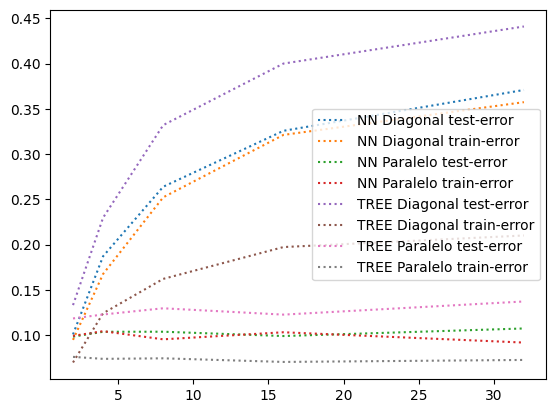

In [20]:
#ANN
error_df_diag, error_df_paral = ej5()
#Tree
dataErrorTrainDiagonal,dataErrorTestDiagonal,dataErrorTrainParalelo,dataErrorTestParalelo = ej4tp1()
#Graficamos ANN Diagonal
plt.plot(error_df_diag['d'], error_df_diag['Test Error'], label="NN Diagonal test-error", linestyle=":")
plt.plot(error_df_diag['d'], error_df_diag['Train Error'], label="NN Diagonal train-error", linestyle=":")
#Graficamos ANN Paralelo
plt.plot(error_df_paral['d'], error_df_paral['Test Error'], label="NN Paralelo test-error", linestyle=":")
plt.plot(error_df_paral['d'], error_df_paral['Train Error'], label="NN Paralelo train-error", linestyle=":")
#Graficamos TREE Diagonal
plt.plot(dataErrorTestDiagonal['D'], dataErrorTestDiagonal['Error Test'], label="TREE Diagonal test-error", linestyle=":")
plt.plot(dataErrorTrainDiagonal['D'], dataErrorTrainDiagonal['Error Train'], label="TREE Diagonal train-error", linestyle=":")
#Graficamos TREE Paralelo
plt.plot(dataErrorTestParalelo['D'], dataErrorTestParalelo['Error Test'], label="TREE Paralelo test-error", linestyle=":")
plt.plot(dataErrorTrainParalelo['D'], dataErrorTrainParalelo['Error Train'], label="TREE Paralelo train-error", linestyle=":")

plt.legend()
plt.show()


### EJERCICIO 6: Iris
No se que comentar en el iris porque es por defecto...

Grafica Iris


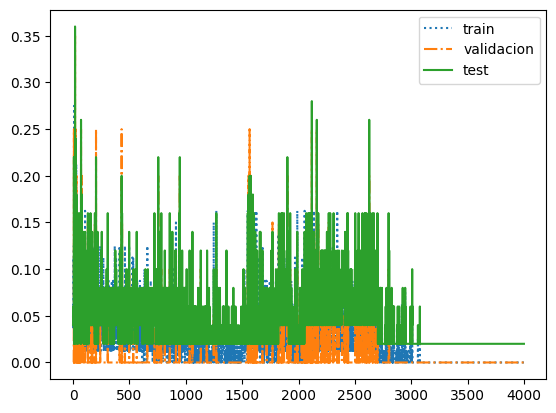

In [23]:
def irisPapa():
    epochs=200 # numero de epocas que entrena cada vez
    N2=6  # neuronas en la capa oculta
    evals=4000 # evalauciones del entrenamiento
    eta=0.01 # learning rate
    alfa=0.9 # momentum

    iris = load_iris()
    X = iris.data
    y = iris.target
    X_data, X_test, y_data, y_test = train_test_split(X, y, random_state=0, test_size = 1/3)
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=0, test_size = 0.2)

    # Creo la red neuronal
    classif  = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)
    nn, e_train, e_val, e_test, best_e_train, best_e_val, best_e_test = entrenar_red(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test,RegClas = 1)
    print("Grafica Iris")
    graficar_errores_contra_epocas(e_train, e_val, e_test, evals)

irisPapa()

### EJERCICIO 6: FACES
Realizo la minmax normalization, a cada valor le resto el minimo de su columna y lo divido por la diferencia del maximo y el minimo de la columna ai queda en e3l rango de 0 a 1... creo que asi se hace es teorica y funciona para valores neg y pos

Podemos decir que es mas rapido el entrenamiento a comparacion del anterior y mas constantes, dado que se logran acomodar los pesos desde el comienzo y solucionando todo :). Lo sorprendente el corto tiempo para ser multiclase aprox 6.33 min. se podria decir que hay un leve muy leve sobreentrenamiento porque el valid empieza a subir pero es muy leve en el orden del 0.01

Grafica Faces


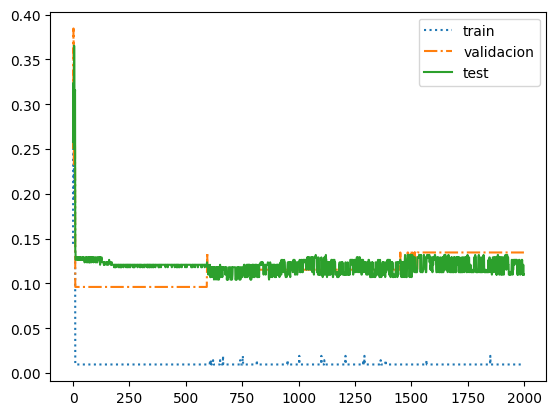

In [17]:
def normalize(df): #Normalizacion 
    #print("ORIGINAL")
    #display(df)
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    #print("NORMAL")
    #display(result)
    return result

def ej6Faces():
    epochs=50 # numero de epocas que entrena cada vez
    N2=6  # neuronas en la capa oculta
    evals=2000 # evalauciones del entrenamiento
    eta=0.01 # learning rate
    alfa=0.9 # momentum

    col_names = list(range(960)) + ['Class']
    x_col_names = col_names[:-1]
    y_col_name = col_names[-1]

    # Leo el conjunto de datos utilizado para entrenar y validar
    df_data_faces = pd.read_csv("faces.data", header=None, names = col_names)
    # Leo el conjunto de test
    df_test_faces = pd.read_csv("faces.test", header=None, names = col_names)

    #Normalizo los dataframes
    df_data_faces_norm = normalize(df_data_faces)
    df_test_faces_norm = normalize(df_test_faces)

    #Saco los valores para entrenar con el test size
    #EL "Y" COMO ES UN CLASIFICADOR NO SE NORMALIZA HDP PALURDO INCULTO ("Y" ES COLUMNA ENTERA LPM), ASI QUE LA "Y" LA SACO DEL VIEJO DF NO NORMALIZADO O NORMALIZO TODO Y DIGO y_test=y_data.astype('int')
    X_data, y_data = df_data_faces_norm[x_col_names], df_data_faces[y_col_name]
    X_test, y_test = df_test_faces_norm[x_col_names], df_test_faces[y_col_name]

    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=0, test_size=0.2)

    #Entreno el clasificador 
    classif  = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)
    nn, e_train, e_val, e_test, best_e_train, best_e_val, best_e_test = entrenar_red(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test,RegClas = 1)

    print("Grafica Faces")
    graficar_errores_contra_epocas(e_train, e_val, e_test, evals)

ej6Faces()

### EJERCICIO 7
Lo que podemos ver es que si vien los errores no cambian en cuando a lo "constante" podemos ver que al cambiar ese paquete unitario de datos el batch size con eso modificamos la varianza de los errores en ese comportamiento "constante" haciendo que sean menos erratico esa varianza de los puntos porque ya no agarramos y analizamos de a uno sino que analizamos de a paquetes. Y se da como un "colapso" de la grafica de batch 1 en las demas minimizando

Grafica Batch: 1


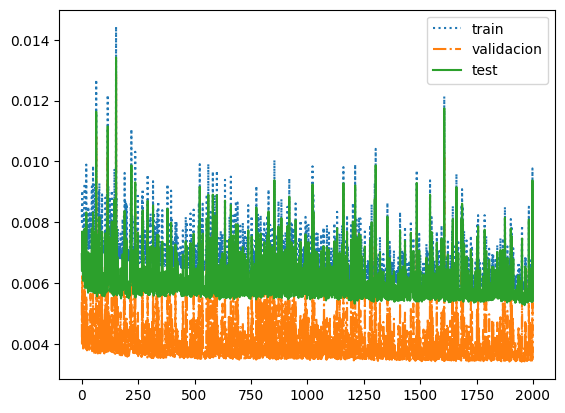

Grafica Batch: 8


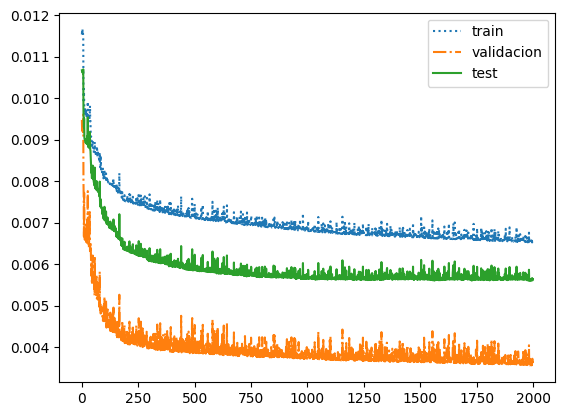

Grafica Batch: 16


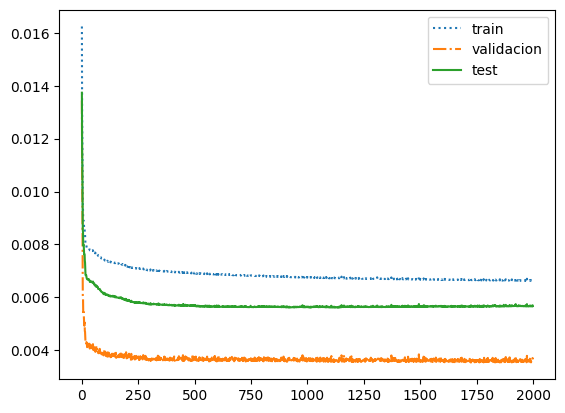

In [24]:
def ej7():
    #Declaramos los parametros para la red
    N2 = 6 #Cantidad de neuronas
    evaluaciones = 2000 #Evaluaciones por cada entrenamiento(evaluaciones ssame epocas???)
    epocas = 200 #Epocas por cada entrenamiento
    eta = 0.05 #learning rate
    alfa = 0.3 #momentum
    batches = [1,8,16] #TOMA DE MUCHOS DATOS, paso de comer datos :V

    columnsX = ["X"+str(i) for i in range(1,13)] 
    columnsY = ["Y"]
    data_df = pd.read_csv('ssp.data', names=columnsX + columnsY)
    dots_X_trainval, dots_y_trainval = data_df.loc[:,columnsX], data_df.loc[:,columnsY]
    dots_X_train, dots_X_val, dots_y_train, dots_y_val = train_test_split(dots_X_trainval, dots_y_trainval, random_state=0, test_size=0.2)

    test_df = pd.read_csv('ssp.test', names=columnsX + columnsY)
    dots_X_test, dots_y_test = test_df.loc[:,columnsX], test_df.loc[:,columnsY]

    for bacha in batches:
        regr = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', batch_size=bacha, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
        nn, e_train, e_val, e_test, best_e_train, best_e_val, best_e_test = entrenar_red(regr, evaluaciones, dots_X_train, dots_y_train, dots_X_val, dots_y_val, dots_X_test, dots_y_test, RegClas = 0)
        print("Grafica Batch: "+str(bacha))
        graficar_errores_contra_epocas(e_train, e_val, e_test, evaluaciones)
  
ej7()